In [195]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
sns.set()

In [196]:
df = pd.read_csv('train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [197]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [198]:
df.isnull().mean()

Unnamed: 0           0.000000
Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
New_Price            0.863100
Price                0.000000
dtype: float64

In [199]:
df.drop(['Unnamed: 0','New_Price'],axis=1,inplace=True)

In [200]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [201]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [202]:
df.describe(include= 'O')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,6019,6019,6019,6019,6019,6017,5983,5983
unique,1876,11,5,2,4,442,146,372
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp
freq,49,790,3205,4299,4929,172,606,235


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


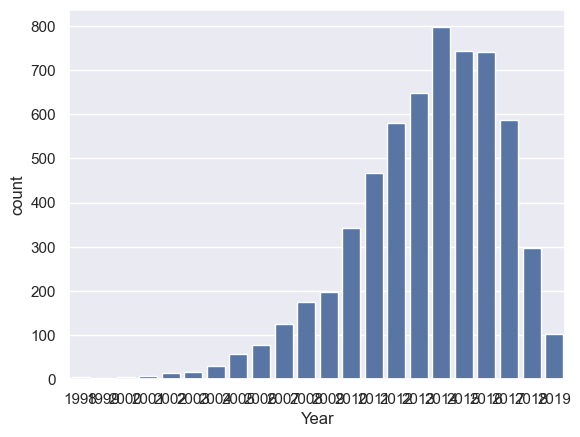

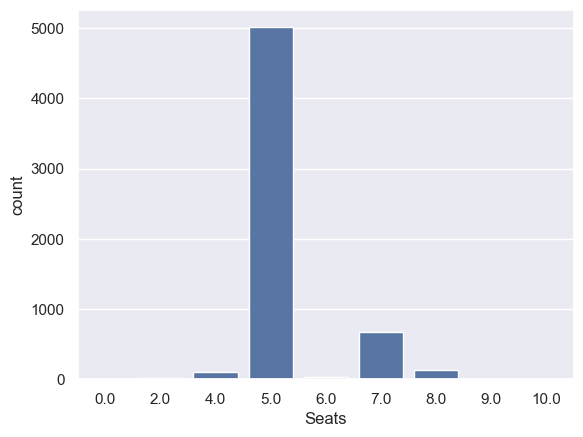

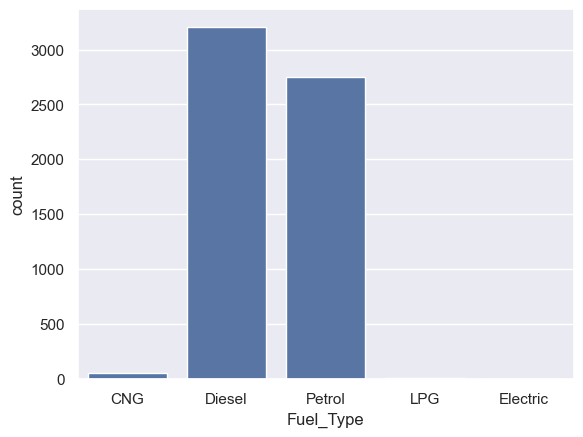

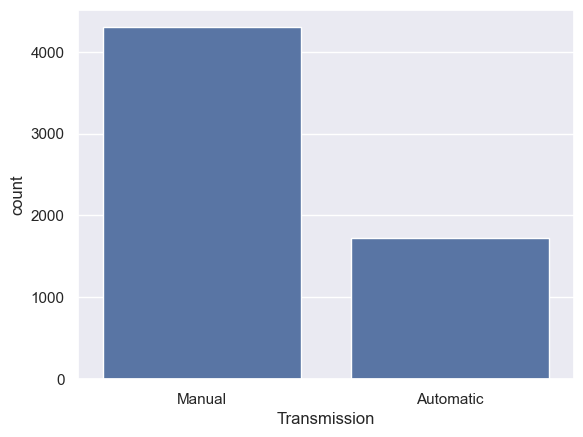

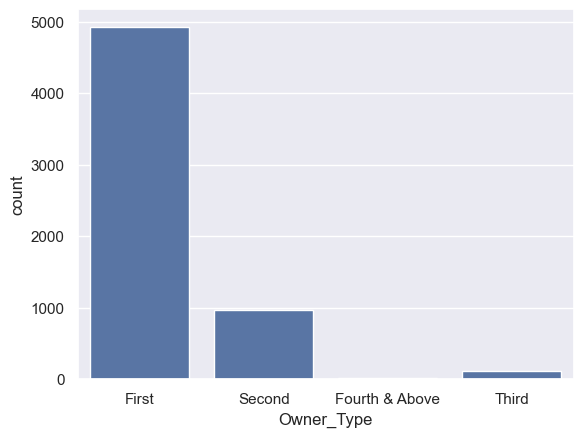

In [204]:
for col in ['Year','Seats','Fuel_Type','Transmission','Owner_Type']:
    df[col] = df[col].astype('object')
    sns.countplot(data=df,x=col)
    plt.show()


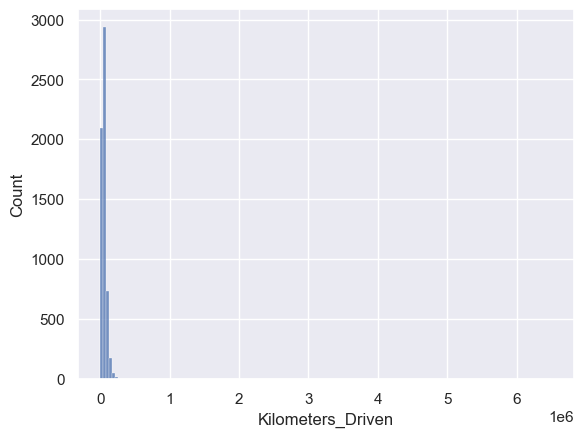

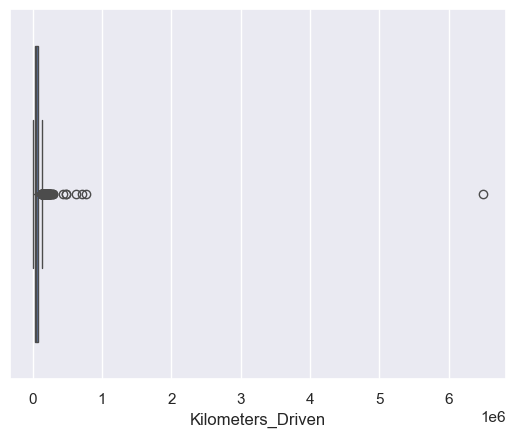

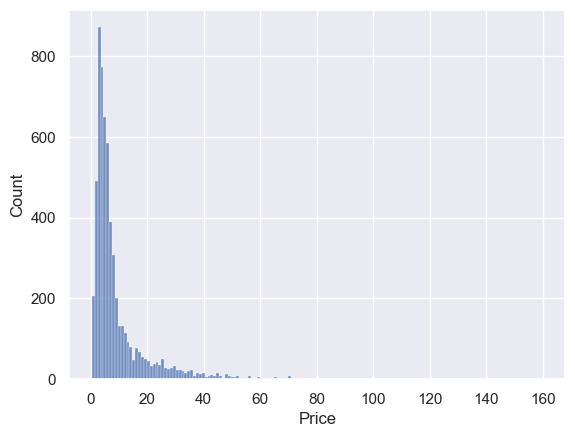

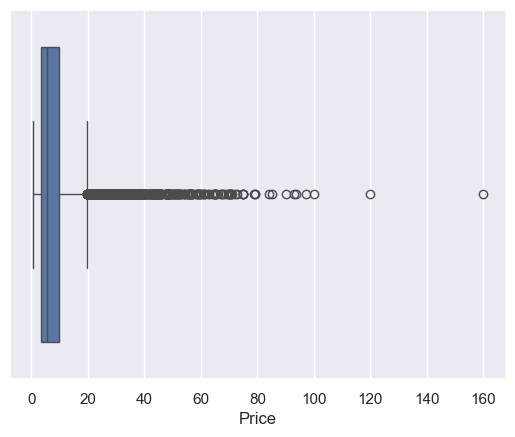

In [205]:
for col in ['Kilometers_Driven','Price']:
    sns.histplot(data=df,x=col)
    plt.show()
    sns.boxplot(data=df,x=col)
    plt.show()

In [206]:
df['Price_usd'] = df['Price'] * 1193.15

In [207]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_usd
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,2088.0125
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,14914.3750
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,5369.1750
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,7158.9000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,21166.4810


<Axes: xlabel='Price_usd'>

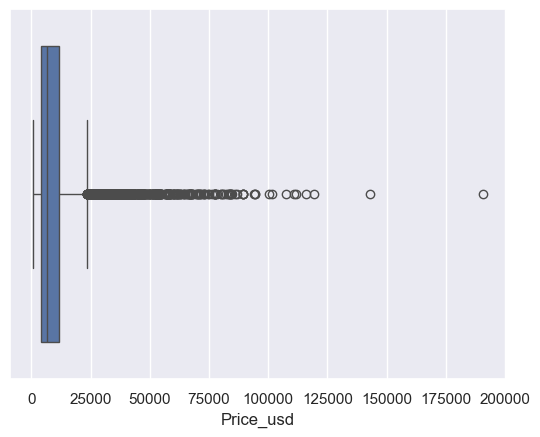

In [208]:
sns.boxplot(data=df , x='Price_usd')

In [209]:
df['Brand'] = df['Name'].apply(lambda x: x.split()[0])

In [210]:
df['Brand']

0          Maruti
1         Hyundai
2           Honda
3          Maruti
4            Audi
          ...    
6014       Maruti
6015      Hyundai
6016     Mahindra
6017       Maruti
6018    Chevrolet
Name: Brand, Length: 6019, dtype: object

In [211]:
df['Brand'].nunique()

31

In [212]:
df['Brand'].value_counts()

Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Isuzu               1
Ambassador          1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

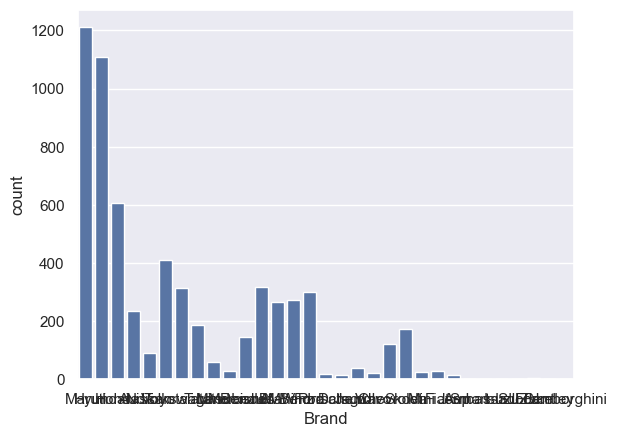

In [213]:
sns.countplot(data=df,x='Brand')
plt.show()

In [214]:
df['Model'] = df['Name'].apply(lambda x: x.split()[1])
df['Model'].nunique()

212

In [215]:
df['Year'].nunique()

22

In [216]:
df['Year'].value_counts()

Year
2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
2000      4
1998      4
1999      2
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='Price'>

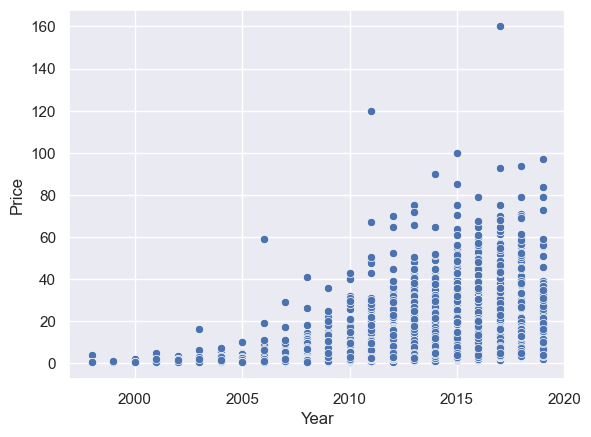

In [217]:
sns.scatterplot(data=df,x='Year',y='Price')

<Axes: xlabel='Year', ylabel='Price'>

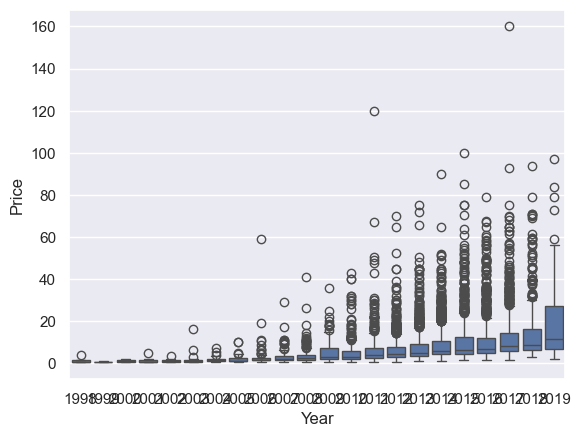

In [218]:
sns.boxplot(data=df,x='Year',y='Price')

In [219]:
df.Year.min(),df.Year.max()

(1998, 2019)

In [220]:
# future engineering
df['Age'] = 2020 - df['Year']

In [221]:
df['Age'].value_counts()

Age
6     797
5     744
4     741
7     649
3     587
8     580
9     466
10    342
2     298
11    198
12    174
13    125
1     102
14     78
15     57
16     31
17     17
18     15
19      8
20      4
22      4
21      2
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

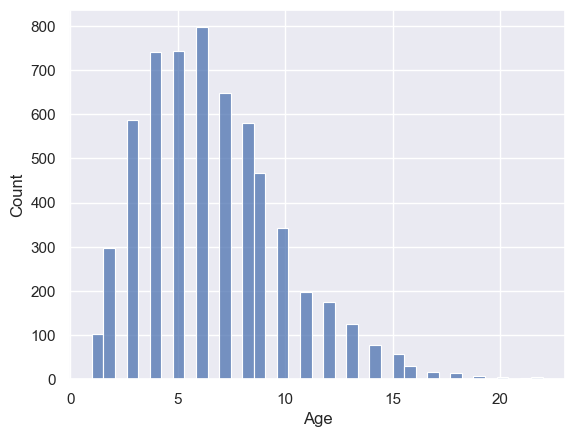

In [222]:
sns.histplot(data=df,x='Age')

In [223]:
# Mileage

df['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [224]:
# df.isna().sum()
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Price_usd             0
Brand                 0
Model                 0
Age                   0
dtype: int64

In [225]:
df.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Price_usd             0
Brand                 0
Model                 0
Age                   0
dtype: int64

In [226]:
def mileage_convert(x):
    if type(x) == str:
        if x.split()[-1] == 'km/kg':
            return float(x.split()[0]) * 1.40  # formela
        elif x.split()[-1] == 'kmpl':
            return float(x.split()[0])
    else:
        return np.nan
    
df['Mileage(kmpl)'] = df['Mileage'].apply(mileage_convert)

In [227]:
df['Mileage(kmpl)'].isna().sum()

np.int64(2)

In [228]:
df['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [229]:
# Engine
def engine_convert(x):
    if type(x) == str:
            return float(x.split()[0])
    else:
        return np.nan
    
df['Engine'] = df['Engine'].apply(engine_convert)

In [230]:
df['Engine']

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
6014    1248.0
6015    1120.0
6016    2498.0
6017     998.0
6018     936.0
Name: Engine, Length: 6019, dtype: float64

In [231]:
df['Engine'].isna().sum()

np.int64(36)

In [232]:
df['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object

In [233]:
df['Power'].str.endswith('bhp').sum()

5983

In [234]:
df['Power'].isna().sum()

np.int64(36)

In [235]:
# power 
def Power_convert(x):
    if type(x) == str:
            return x.split()[0]
    else:
        return np.nan
    
df['Power'] = df['Power'].apply(Power_convert)

In [236]:
df['Power']

0       58.16
1       126.2
2        88.7
3       88.76
4       140.8
        ...  
6014       74
6015       71
6016      112
6017     67.1
6018     57.6
Name: Power, Length: 6019, dtype: object

In [237]:
df['Power'] = pd.to_numeric(df['Power'],errors='coerce')

In [238]:
df['Power']

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
6014     74.00
6015     71.00
6016    112.00
6017     67.10
6018     57.60
Name: Power, Length: 6019, dtype: float64

In [239]:
df['Power'].isna().sum()

np.int64(143)

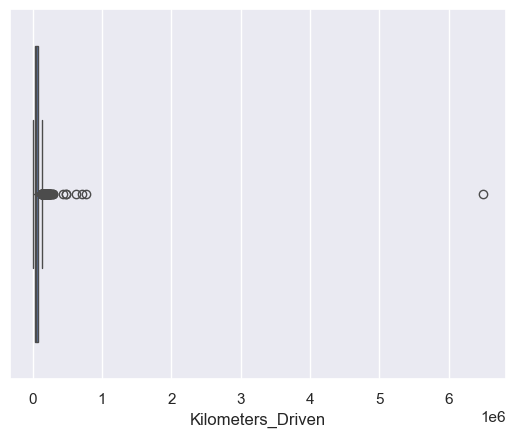

In [240]:
sns.boxplot(data=df,x='Kilometers_Driven')
plt.show()

<Axes: xlabel='Seats', ylabel='count'>

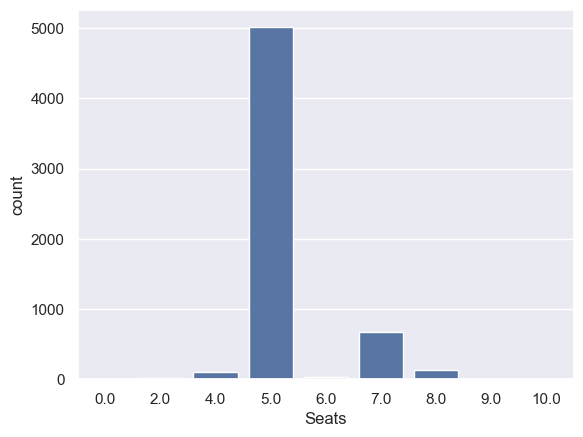

In [241]:
sns.countplot(data=df,x='Seats')


In [242]:
df['Seats'].value_counts()

Seats
5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: count, dtype: int64

In [243]:
df.drop(df[df['Seats'] == 0].index,axis=0 , inplace=True)

In [244]:
df[df['Kilometers_Driven'] == df['Kilometers_Driven'].max()].index

Index([2328], dtype='int64')

In [245]:
df.drop(df[df['Kilometers_Driven'] == df['Kilometers_Driven'].max()].index,axis=0 , inplace=True)

<Axes: xlabel='Kilometers_Driven'>

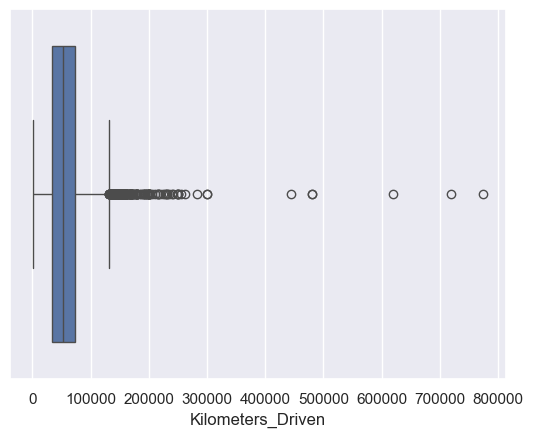

In [246]:
sns.boxplot(data=df,x='Kilometers_Driven')

<Axes: xlabel='Seats', ylabel='count'>

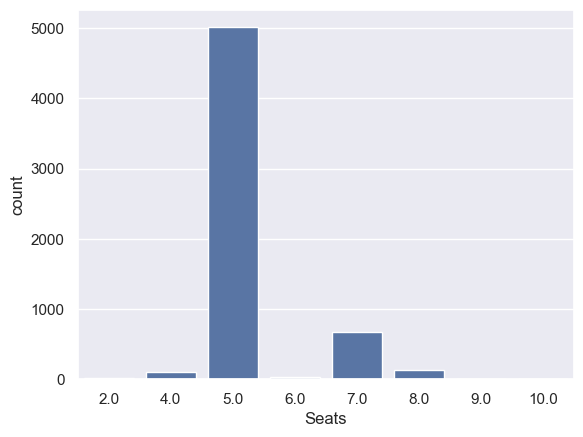

In [247]:
sns.countplot(data=df,x='Seats')

missing data 

In [248]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Price_usd,Brand,Model,Age,Mileage(kmpl)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,2088.0125,Maruti,Wagon,10,37.24
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,14914.3750,Hyundai,Creta,5,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,5369.1750,Honda,Jazz,9,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,7158.9000,Maruti,Ertiga,8,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,21166.4810,Audi,A4,7,15.20


In [249]:
df.isna().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                142
Seats                 42
Price                  0
Price_usd              0
Brand                  0
Model                  0
Age                    0
Mileage(kmpl)          2
dtype: int64

In [250]:
df.drop(['Mileage','Year','Price_usd'],axis=1 , inplace=True)

In [251]:
df.isna().mean()

Name                 0.000000
Location             0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Engine               0.005983
Power                0.023600
Seats                0.006980
Price                0.000000
Brand                0.000000
Model                0.000000
Age                  0.000000
Mileage(kmpl)        0.000332
dtype: float64

outlyers

In [252]:
df.dtypes

Name                  object
Location              object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Engine               float64
Power                float64
Seats                 object
Price                float64
Brand                 object
Model                 object
Age                   object
Mileage(kmpl)        float64
dtype: object

In [253]:
df['Age'] = df['Age'].astype('int')

In [254]:
numircal_collums = df.select_dtypes(exclude='object').columns

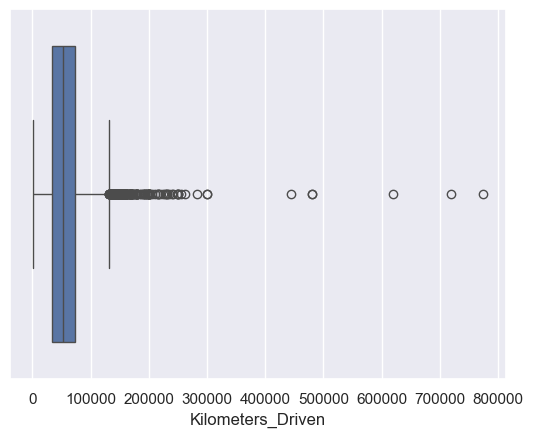

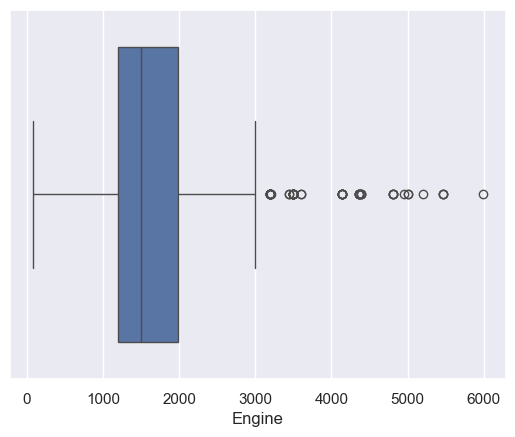

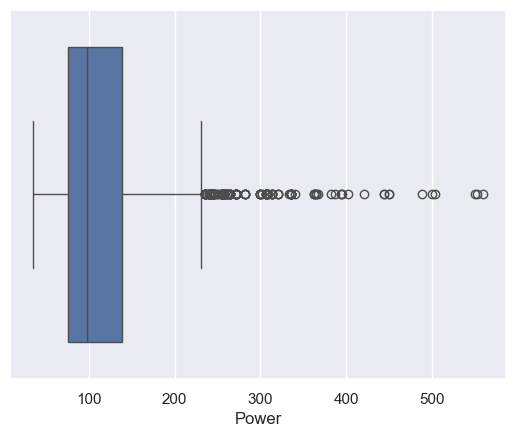

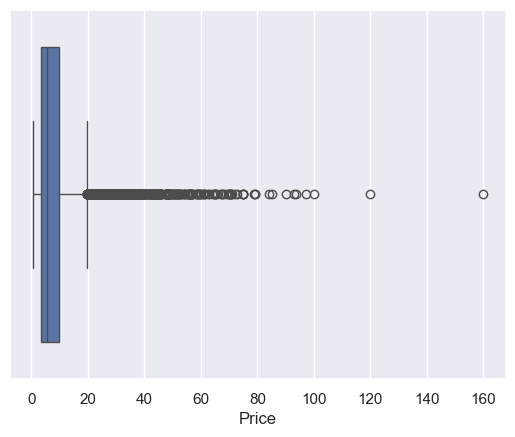

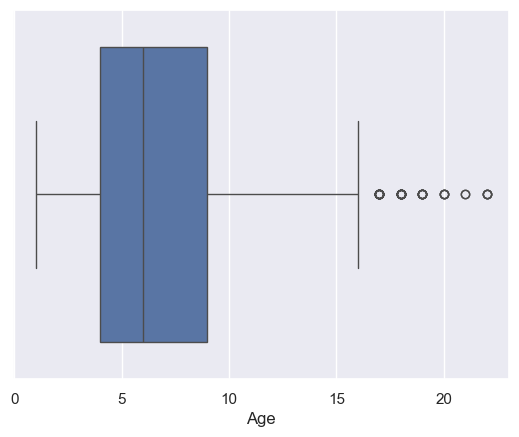

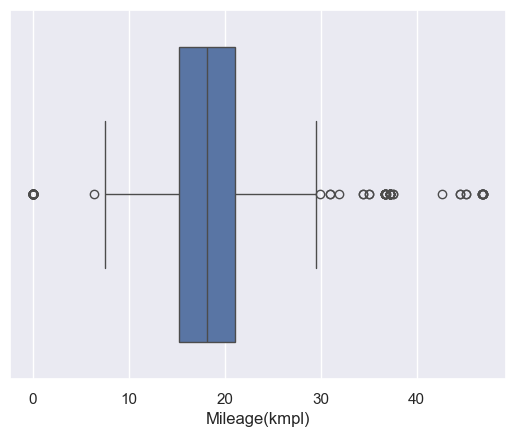

In [255]:
for col in numircal_collums:
    sns.boxplot(data=df,x=col)
    plt.show()

In [256]:
df['Kilometers_Driven'].quantile([0.7,0.8,0.9,0.95,0.995,0.999,1])

0.700     68367.000
0.800     79000.000
0.900     96827.000
0.950    120000.000
0.995    200000.000
0.999    299989.152
1.000    775000.000
Name: Kilometers_Driven, dtype: float64

In [257]:
df['Kilometers_Driven'].quantile(0.999)

np.float64(299989.15200000023)

In [258]:
df2 = df[df['Kilometers_Driven'] < df['Kilometers_Driven'].quantile(0.999)]


<Axes: xlabel='Kilometers_Driven'>

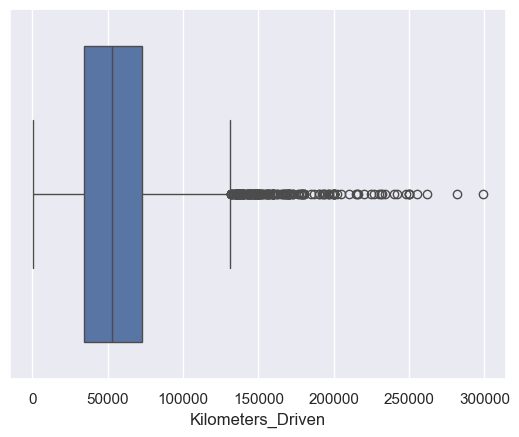

In [259]:
sns.boxplot(data=df2,x='Kilometers_Driven')

In [260]:
def handele_outler(x,p1=0.25,p2=0.75):
    q1 = x.quantile(p1)
    q3 = x.quantile(p2)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr 
    max_limit = q3 + 1.5 * iqr 
    return x[(x > min_limit) & (x < max_limit)]

In [261]:
df3 = df2.copy()

In [262]:
df.columns

Index(['Name', 'Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Engine', 'Power', 'Seats', 'Price', 'Brand', 'Model',
       'Age', 'Mileage(kmpl)'],
      dtype='object')

In [263]:
for col in ['Engine','Power','Mileage(kmpl)']:
    df3[col] = handele_outler(df3[col])


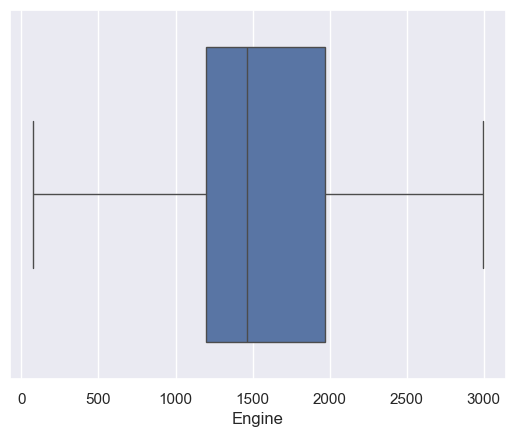

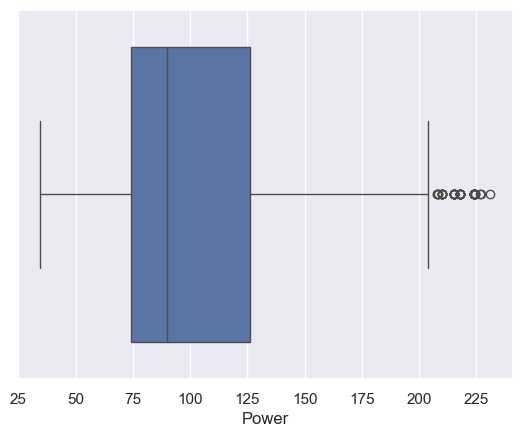

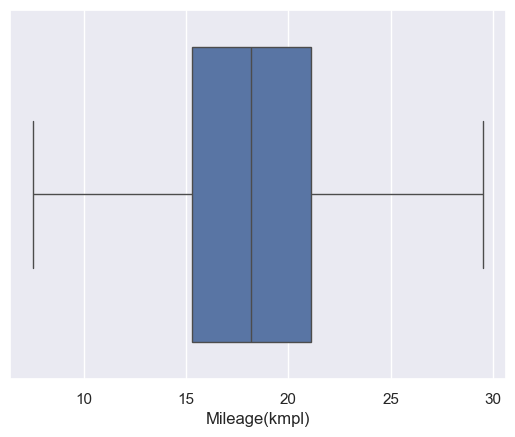

In [264]:
for col in ['Engine','Power','Mileage(kmpl)']:
    sns.boxplot(data=df3,x=col)
    plt.show()

In [265]:
df3.describe()

,Kilometers_Driven,Engine,Power,Price,Age,Mileage(kmpl)
count,6010.000000,5914.000000,5631.000000,6010.000000,6010.000000,5892.000000
mean,57088.404493,1597.229117,106.224324,9.473273,6.640932,18.290740
std,33619.276252,551.181201,40.717823,11.171385,3.270445,4.099188
min,171.000000,72.000000,34.200000,0.440000,1.000000,7.500000
25%,34000.000000,1197.000000,74.000000,3.500000,4.000000,15.300000
50%,53000.000000,1462.000000,90.000000,5.640000,6.000000,18.200000
75%,72999.000000,1968.000000,126.320000,9.950000,9.000000,21.100000
max,299322.000000,2999.000000,231.100000,160.000000,22.000000,29.540000


In [266]:
df3.describe(include='O')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Model
count,6010,6010,6010,6010,6010,5968.0,6010,6010
unique,1874,11,5,2,4,8.0,31,212
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,5.0,Maruti,Swift
freq,49,790,3200,4294,4920,5006.0,1211,353


In [267]:
df3.drop('Name',axis=1,inplace=True)

data splitting

In [268]:
X = df3.drop('Price',axis=1)
Y = df3['Price']

In [269]:
print(X.shape)
print(Y.shape)

(6010, 12)
(6010,)


In [281]:
num_cols = X.select_dtypes(exclude='object').columns.to_list()


print(num_cols)


['Kilometers_Driven', 'Engine', 'Power', 'Age', 'Mileage(kmpl)']


In [282]:
nominal_cols = ['Location','Fuel_Type','Transmission','Brand']
ordinal_cols = ['Owner_Type','Seats',]

In [283]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [284]:
x_train.shape,x_test.shape

((4808, 12), (1202, 12))

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [289]:
num_pipeline = Pipeline([
        ('num_imuter',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())

])

ordinal_pipeline = Pipeline([
        ('ord_imuter',SimpleImputer(strategy='most_frequent')),
        ('ord_encoder',OrdinalEncoder())
])

nominal_pipeline = Pipeline([
        ('nom_imuter',SimpleImputer(strategy='most_frequent')),
        ('ohe',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'))
])

In [290]:
preproccessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_cols),
    ('ordinal_pipeline',ordinal_pipeline,ordinal_cols),
    ('nominal_pipeline',nominal_pipeline,nominal_cols)
])

In [292]:
# Remove 'Price' from num_cols since it's not in x_train/x_test
num_cols = [col for col in num_cols if col != 'Price']

preproccessor = ColumnTransformer([
	('num_pipeline', num_pipeline, num_cols),
	('ordinal_pipeline', ordinal_pipeline, ordinal_cols),
	('nominal_pipeline', nominal_pipeline, nominal_cols)
]).set_output(transform='pandas')

x_train_preprocessed = preproccessor.fit_transform(x_train)
x_test_preprocessed = preproccessor.transform(x_test)

C:\Users\Mahmoud Abuelhassan\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [293]:
x_train_preprocessed

,num_pipeline__Kilometers_Driven,num_pipeline__Engine,num_pipeline__Power,num_pipeline__Age,num_pipeline__Mileage(kmpl),ordinal_pipeline__Owner_Type,ordinal_pipeline__Seats,nominal_pipeline__Location_Bangalore,nominal_pipeline__Location_Chennai,nominal_pipeline__Location_Coimbatore,...,nominal_pipeline__Brand_Mitsubishi,nominal_pipeline__Brand_Nissan,nominal_pipeline__Brand_Porsche,nominal_pipeline__Brand_Renault,nominal_pipeline__Brand_Skoda,nominal_pipeline__Brand_Smart,nominal_pipeline__Brand_Tata,nominal_pipeline__Brand_Toyota,nominal_pipeline__Brand_Volkswagen,nominal_pipeline__Brand_Volvo
5644,-0.117769,-0.167915,-0.426217,-0.193670,0.453403,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4442,0.690664,-0.354527,-0.909933,-0.806884,1.655049,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2354,0.062336,-0.718603,-0.657892,0.419544,0.507799,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5344,-0.116310,-0.718603,-0.583297,-0.500277,0.072635,0.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3309,-0.498672,-0.014234,0.546308,-1.113491,0.337195,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,-0.139921,-0.718603,-0.657892,-0.500277,-0.147420,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5200,-0.557834,-1.080849,-0.960851,-1.420098,1.036919,2.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5235,-0.473602,-0.714944,-0.568786,-0.500277,-0.026266,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5399,0.330305,0.560237,0.032041,0.726151,-0.669122,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


model trainng

In [294]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_preprocessed,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [295]:
model.intercept_

np.float64(18.84303521880034)

In [296]:
model.coef_

array([-1.11213234e+00,  3.58490995e+00, -1.53111160e+00, -3.21919898e+00,
       -1.58139282e+00, -1.23439693e-01, -3.84751103e-02,  2.23836439e+00,
        1.23596064e+00,  1.76060074e+00, -4.82368815e-01,  1.59294255e+00,
        7.49385166e-01, -1.49747864e-01, -1.20370368e+00, -7.26000461e-01,
        4.25938265e-01,  2.95095604e+00,  1.07530657e+01,  2.28415865e+00,
        1.05766413e+00, -1.44587763e+00,  8.00720657e-01,  4.09975260e+01,
       -1.34836148e+01, -1.60443360e+01, -1.32977890e+01, -1.51494534e+01,
       -1.30224240e+01, -1.27862710e+01, -1.28451463e+01, -2.18236751e+01,
        9.54841135e+00, -7.01538133e+00,  1.01848975e+02,  1.37618295e+01,
       -1.68275331e+01, -1.24108566e+01,  1.08663422e+00,  3.92104313e+00,
       -1.40197293e+01, -1.42077640e+01,  1.50472354e+01, -1.40617213e+01,
       -1.23364655e+01, -7.57771683e+00, -1.52901078e+01, -1.31026948e+01,
       -1.43453215e+01, -4.56800158e+00])

In [ ]:
#Error evaluation

from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(x_test_preprocessed)
print('R2 Score:',r2_score(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))



R2 Score: 0.74663186197323
MSE: 28.953758452809954
rMSE: 5.380869674393717


In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train_preprocessed,y_train)
y_ridge_pred = ridge_model.predict(x_test_preprocessed)
print('R2 Score:',r2_score(y_test,y_ridge_pred))
print('MSE:',mean_squared_error(y_test,y_ridge_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_ridge_pred)))


# note when incresse alpha the model perfermance decresse becuse the model is underfitting



R2 Score: 0.7466495778978566
MSE: 28.951733957518638
RMSE: 5.380681551394641


In [302]:
# applying polynomial features
from sklearn.preprocessing import PolynomialFeatures
num_pipeline = Pipeline([
        ('num_imuter',SimpleImputer(strategy='median')),
        ('poly',PolynomialFeatures(degree=2,include_bias=False)),
        ('scaler',StandardScaler())

]) 

ordinal_pipeline = Pipeline([
        ('ord_imuter',SimpleImputer(strategy='most_frequent')),
        ('ord_encoder',OrdinalEncoder())
])

nominal_pipeline = Pipeline([
        ('nom_imuter',SimpleImputer(strategy='most_frequent')),
        ('ohe',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'))
])

preproccessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_cols),
    ('ordinal_pipeline',ordinal_pipeline,ordinal_cols),
    ('nominal_pipeline',nominal_pipeline,nominal_cols)
])

x_train_preprocessed = preproccessor.fit_transform(x_train)
x_test_preprocessed = preproccessor.transform(x_test)

C:\Users\Mahmoud Abuelhassan\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [303]:
model = LinearRegression()
model.fit(x_train_preprocessed,y_train)
y_pred = model.predict(x_test_preprocessed)
print('R2 Score:',r2_score(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score: 0.8312522776487228
MSE: 19.283722217291963
RMSE: 4.391323515444058


In [308]:
Y = np.log(df3['Price'])

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


num_pipeline = Pipeline([
        ('num_imuter',SimpleImputer(strategy='median')),
        ('poly',PolynomialFeatures(degree=3,include_bias=False)),
        ('scaler',StandardScaler())

]) 

ordinal_pipeline = Pipeline([
        ('ord_imuter',SimpleImputer(strategy='most_frequent')),
        ('ord_encoder',OrdinalEncoder())
])

nominal_pipeline = Pipeline([
        ('nom_imuter',SimpleImputer(strategy='most_frequent')),
        ('ohe',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'))
])

preproccessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_cols),
    ('ordinal_pipeline',ordinal_pipeline,ordinal_cols),
    ('nominal_pipeline',nominal_pipeline,nominal_cols)
])

x_train_preprocessed = preproccessor.fit_transform(x_train)
x_test_preprocessed = preproccessor.transform(x_test)


model = LinearRegression()
model.fit(x_train_preprocessed,y_train)
y_pred = model.predict(x_test_preprocessed)
print('R2 Score:',r2_score(y_test,y_pred))
print('R2 Score:',model.score(x_train_preprocessed,y_train))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))


R2 Score: 0.9351572196904132
R2 Score: 0.9349441885560277
MSE: 0.05012994611536534
RMSE: 0.22389717755113694


C:\Users\Mahmoud Abuelhassan\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
